Projeto Vendas de calçados

Objetivo: 
Identificar cores e modelos mais vendidos; variedade de preços e os vendedores com mais comentários.

In [ ]:
# Importando bibliotecas para manipular os dados
import pandas as pd
import numpy as np

: 

In [2]:
# Importando base de dados
df = pd.read_csv(r'C:\\Users\\Usuário\Downloads\\archive (8)\\shein_footwear.csv', sep=',', encoding='latin-1')
df.head(2)

,name,link,price_usd,mark_price_usd,star_rating,colour,seller_name,review_count,sku_id,hero_image
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,$19.40,$24.40,4.83,: Khaki,Womens Shoes,(77 Reviews),SKU: sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,$14.90,$18.80,0.00,NaN,Limeiya Factory,NaN,SKU: sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...


Analisando e modelando os dados

In [3]:
# Total de linhas e colunas
df.shape

(1170, 10)

In [4]:
# Verificando e removendo duplicatas
df.drop_duplicates().count()

name              1170
link              1170
price_usd          930
mark_price_usd     877
star_rating       1170
colour             923
seller_name          9
review_count      1075
sku_id            1170
hero_image        1170
dtype: int64

In [5]:
# Salvando "df.drop_duplicates"
df.drop_duplicates(inplace=True)

In [6]:
# Nome das colunas
df.columns

Index(['name', 'link', 'price_usd', 'mark_price_usd', 'star_rating', 'colour',
       'seller_name', 'review_count', 'sku_id', 'hero_image'],
      dtype='object')

In [7]:
# Renomeando as colunas
df.columns=['descrição calçado', 'link','preço','preço de marca', 'classificacao','cor','vendedor','comentários','sku id','imagem heroi']
df.columns

Index(['descrição calçado', 'link', 'preço', 'preço de marca', 'classificacao',
       'cor', 'vendedor', 'comentários', 'sku id', 'imagem heroi'],
      dtype='object')

In [8]:
# Verificando valores faltantes
df.isnull().sum()

descrição calçado       0
link                    0
preço                 240
preço de marca        293
classificacao           0
cor                   247
vendedor             1161
comentários            95
sku id                  0
imagem heroi            0
dtype: int64

In [ ]:
# Coluna 'preco', valores únicos
df['preço'].unique()

array(['$19.40', '$14.90', '$7.50', '$12.06', '$13.53', '$21.30',
       '$16.90', '$22.90', '$13.00', nan, '$9.30', '$21.00', '$20.80',
       '$8.50', '$14.30', '$19.70', '$10.30', '$16.00', '$14.80',
       '$13.70', '$11.10', '$15.81', '$14.08', '$17.82', '$24.10',
       '$13.20', '$23.10', '$10.50', '$15.60', '$7.30', '$25.10',
       '$23.30', '$15.20', '$13.09', '$16.50', '$14.50', '$20.30',
       '$21.40', '$6.13', '$24.20', '$20.90', '$15.70', '$17.50',
       '$19.90', '$16.40', '$35.99', '$14.70', '$12.50', '$14.40',
       '$12.25', '$26.30', '$13.40', '$14.10', '$13.80', '$19.00',
       '$12.26', '$18.82', '$48.80', '$18.59', '$10.80', '$9.48',
       '$10.68', '$32.99', '$15.80', '$11.20', '$17.00', '$18.15',
       '$14.96', '$17.30', '$13.90', '$12.98', '$23.65', 'From', '$17.10',
       '$12.80', '$17.38', '$10.78', '$20.50', '$11.04', '$13.86',
       '$16.80', '$14.52', '$16.20', '$22.50', '$11.90', '$12.40',
       '$10.32', '$23.00', '$22.44', '$39.99', '$18.60'

In [ ]:
# Remover e substituir o símbolo '$' e 'From' da coluna 'preço'
df['preço'] = df['preço'].str.replace('$', '').str.replace('From', '0')
print(df['preço'])

0       19.40
1       14.90
2        7.50
3       12.06
4       13.53
        ...  
1165      NaN
1166    22.22
1167     1.40
1168    33.96
1169     0.61
Name: preço, Length: 1170, dtype: object


In [ ]:
# Converter coluna 'preço' para tipo numérico
df['preço'] = pd.to_numeric(df['preço'], errors='coerce')

# Substituir NaN por 0  
df['preço'] = df['preço'].fillna(0)
df['preço'].head(3)

0    19.4
1    14.9
2     7.5
Name: preço, dtype: float64

In [12]:
# Valores da coluna 'preço de marca', valores únicos
df['preço de marca'].unique()

array(['$24.40', '$18.80', '$21.30', '$17.05', '$26.90', nan, '$21.20',
       '$28.80', '$16.30', '$11.70', '$26.40', '$26.10', '$10.40',
       '$18.00', '$24.90', '$13.00', '$20.10', '$19.60', '$16.60',
       '$14.00', '$23.40', '$17.71', '$29.70', '$13.40', '$29.10',
       '$16.50', '$14.40', '$9.10', '$31.60', '$29.40', '$20.20',
       '$15.84', '$20.80', '$18.30', '$27.00', '$19.70', '$49.99',
       '$25.10', '$20.70', '$45.99', '$18.60', '$15.80', '$18.10',
       '$24.00', '$33.10', '$16.20', '$17.70', '$17.40', '$23.90',
       '$26.89', '$22.10', '$22.44', '$50.60', '$26.30', '$23.43',
       '$13.60', '$12.70', '$14.20', '$22.88', '$18.92', '$21.80',
       '$16.39', '$29.81', '$21.50', '$16.10', '$21.89', '$13.53',
       '$25.80', '$18.40', '$23.10', '$125.99', '$18.26', '$15.00',
       '$13.50', '$29.04', '$16.90', '$24.80', '$28.27', '$20.40',
       '$30.30', '$23.60', '$21.34', '$31.90', '$35.80', '$23.00',
       '$15.70', '$23.50', '$19.30', '$19.47', '$27.94', 

In [ ]:
# Remover e substituir o símbolo '$' da coluna 'preço de marca'
df['preço de marca'] = df['preço de marca'].str.replace('$', '')
print(df['preço de marca'].head(3))

0    24.40
1    18.80
2    18.80
Name: preço de marca, dtype: object


In [ ]:
# Substituir np.nan por 0 da coluna 'preço de marca'
df['preço de marca'] = df['preço de marca'].fillna(0)

# Converter para float
df['preço de marca'] = df['preço de marca'].astype(float)
print(df['preço de marca'].head())


0    24.40
1    18.80
2    18.80
3    21.30
4    17.05
Name: preço de marca, dtype: float64


In [16]:
# Coluna 'cor', valores únicos
df['cor'].unique()

array([': Khaki', nan, ': Purple', ': Grey', ': White', ': Beige',
       ': Brown', ': Multicolor', ': Black', ': White and Blue', ': Blue',
       ': Apricot', ': Rose Gold', ': Pink', ': Coffee Brown', ': Yellow',
       ': Camel', ': Rust Brown', ': Dark Grey', ': White Card',
       ': Blue and White', ': Dusty Pink', ': White Pink', ': Gold',
       ': WHITE', ': Black Purple', ': White/Blue Leaf', ': Hot Pink',
       ': Burnt Orange', ': Champagne', ': Clear', ': Orange', ': Red',
       ': Green', ': Navy Blue', ': Silver', ': Yellow Blue',
       ': dark brown', ': Black and White', ': Mint Green',
       ': Pink Brown', ': Baby Pink', ': Black Khaki', ': Royal Blue',
       ': Teal Blue', ': Blue Cloth', ': Chocolate Brown', ': Burgundy',
       ': SILVER/GLITTER', ': black flip flops', ': Green Shiny Leather',
       ': Medium Cool Black', ': Red Violet', ': Violet Purple',
       ': Brown and White', ': Dusty Purple', ': Leopard Print',
       ': Red and White', ': Army Gr

In [ ]:
# Removendo ':' da coluna 'cor'
df['cor'] = df['cor'].str.strip(":").astype(str)
print(df['cor'].head(5))

0      Khaki
1        nan
2        nan
3     Purple
4       Grey
Name: cor, dtype: object


In [18]:
# Substituir 'nan' por np.nan da coluna 'cor'
df.replace({'cor': 'nan'}, np.nan, inplace=True)

# Substituir np.nan por 0
df.fillna({'cor': 0}, inplace=True)
print(df['cor'].head(3))

0     Khaki
1         0
2         0
Name: cor, dtype: object


In [19]:
# Coluna 'vendedor', valores únicos
df['vendedor'].unique()

array(['Womens Shoes', 'Limeiya Factory', 'Dawanfu', nan, 'liyuyu',
       'Jessy Well', 'WHC-', 'Rlyza', 'SHEIN Haute', 'Eley'], dtype=object)

In [19]:
# Substituindo valores da coluna 'vendedor'
df.replace({'vendedor': 'nan'}, np.nan, inplace=True)

# Substituir np.nan por 0
df.fillna({'vendedor': 0}, inplace=True)

# Exibir
print(df['vendedor'].head(3))

0       Womens Shoes
1    Limeiya Factory
2            Dawanfu
Name: vendedor, dtype: object


In [20]:
# Coluna 'contagem comentários', valores únicos
df['comentários'].unique()

array(['(77 Reviews)', nan, '(66 Reviews)', '(41 Reviews)',
       '(100+ Reviews)', '(500+ Reviews)', '(15 Reviews)', '(36 Reviews)',
       '(93 Reviews)', '(1000+ Reviews)', '(55 Reviews)', '(42 Reviews)',
       '(45 Reviews)', '(88 Reviews)', '(53 Reviews)', '(23 Reviews)',
       '(6 Reviews)', '(5 Reviews)', '(9 Reviews)', '(33 Reviews)',
       '(14 Reviews)', '(18 Reviews)', '(95 Reviews)', '(4 Reviews)',
       '(38 Reviews)', '(16 Reviews)', '(1 Reviews)', '(44 Reviews)',
       '(86 Reviews)', '(91 Reviews)', '(17 Reviews)', '(37 Reviews)',
       '(3 Reviews)', '(10 Reviews)', '(8 Reviews)', '(7 Reviews)',
       '(78 Reviews)', '(2 Reviews)', '(83 Reviews)', '(70 Reviews)',
       '(11 Reviews)', '(19 Reviews)', '(25 Reviews)', '(40 Reviews)',
       '(51 Reviews)', '(22 Reviews)', '(24 Reviews)', '(69 Reviews)',
       '(92 Reviews)', '(58 Reviews)', '(28 Reviews)', '(59 Reviews)',
       '(67 Reviews)', '(31 Reviews)', '(54 Reviews)', '(87 Reviews)',
       '(68 Reviews

In [ ]:
# Remover os símbolos coluna 'comentários': '(', ')', '+', 'Reviews' 
df['comentários'] = df['comentários'].str.replace('(', '').str.replace(')', '').str.replace('+', '').str.replace('Reviews', '')
print(df['comentários'].head(3))

0    77 
1    NaN
2    66 
Name: comentários, dtype: object


In [22]:
# Substituindo valores da coluna 'comentários'
df.replace({'comentários': 'nan'}, np.nan, inplace=True)

# Substituir np.nan por 0
df.fillna({'comentários': 0}, inplace=True)

# Exibir
print(df['comentários'].head(3))

0    77 
1      0
2    66 
Name: comentários, dtype: object


In [ ]:
# Transformar a coluna 'comentários' tipo numérico
df['comentários'] = pd.to_numeric(df['comentários'], errors='coerce')

Extraindo as informações da base de dados

In [25]:
# Top 5 dos preços
top5 = df['preço'].nlargest(5)
print(f'Top 5 dos maiores preços:\n{top5}')

Top 5 dos maiores preços:
341    247.50
137    231.32
269    200.19
272    169.68
254    119.90
Name: preço, dtype: float64


In [26]:
# Menores preços top 5
nao_zero = df[df['preço'] != 0]['preço']
menores_precos = nao_zero.nsmallest(5)
print(f'Top 5 dos menores preços:\n{menores_precos}')

Top 5 dos menores preços:
1169    0.61
1134    1.26
876     1.40
1167    1.40
979     1.41
Name: preço, dtype: float64


In [27]:
# Média de 'preco'
media = df[df['preço'] != 0]['preço'].mean()
print(f'Média de preços: {media}')

Média de preços: 17.303537263626254


In [28]:
# Top 5 dos maiores preços de marca
top5 = df['preço de marca'].nlargest(5)
print(f'Top 5 dos preços de marca:\n{top5}')

Top 5 dos preços de marca:
255    676.00
144    438.05
137    319.07
276    227.14
269    223.85
Name: preço de marca, dtype: float64


In [29]:
# Top 5 dos menores preços de marca
nao_zero = df[df['preço de marca'] != 0]['preço de marca'].drop_duplicates()
menores_precos = nao_zero.nsmallest(5)
print(f'Top 5 dos menores preços de marca:\n{menores_precos}')

Top 5 dos menores preços de marca:
876     2.1
1154    2.6
737     4.8
1134    6.1
1050    6.2
Name: preço de marca, dtype: float64


In [30]:
# Média de 'preco por marca'
media_marca = df[df['preço de marca'] != 0]['preço de marca'].mean()
print(f'Média de preços de marca: {media_marca}')

Média de preços de marca: 25.392143671607748


In [31]:
# Contagem de valores únicos de 'cor', excluindo o valor 0
count_cor = df[df['cor'] != 0]['cor'].nunique()

print(f'{count_cor} cores')

59 cores


In [32]:
# Filtrando para preços diferentes de 0 e cores diferentes de 0
df_filtrado = df[(df['preço'] != 0) & (df['cor'] != 0)]

# Verificando se o DataFrame filtrado não está vazio
if not df_filtrado.empty:
    # Encontrar o índice do maior preço
    indice_maior_preco = df_filtrado['preço'].idxmax()

    # Obter o maior preço
    maior_preco = df_filtrado.loc[indice_maior_preco, 'preço']

    # Obter a cor correspondente
    cor_maior_preco = df_filtrado.loc[indice_maior_preco, 'cor']

    print(f'O maior preço é {maior_preco} e a cor correspondente é{cor_maior_preco}.')
else:
    print("Não há preços e cores válidos no DataFrame.")


O maior preço é 48.8 e a cor correspondente é Apricot.


In [74]:
# Filtrar as linhas diferente de "0"
cor_diferente_0 = df[df['cor'] != 0]

# Contar a quantidade de vendas por cor e pegar as 3 cores mais vendidas
top_3_cores = cor_diferente_0['cor'].value_counts().head(3)

# Criar uma lista para armazenar os resultados
top_3_resultados = []

# Iterar pelas 3 cores mais vendidas para obter a quantidade e o preço
for cor, quantidade in top_3_cores.items():
    # Filtrar o DataFrame para obter as linhas com a cor específica
    dados_cor = cor_diferente_0[cor_diferente_0['cor'] == cor]
    
    # Obter o preço do primeiro item com essa cor
    preco = dados_cor['preço'].iloc[0]
    
    # Adicionar o resultado à lista
    top_3_resultados.append((cor, quantidade, preco))

print('Top 3 mais vendidos:')
# Exibindo o resultado
for i, (cor, quantidade, preco) in enumerate(top_3_resultados, start=1):
    print(f"{i}º lugar: A cor {cor} teve {quantidade} vendas. Preço: R${preco:.2f}")


Top 3 mais vendidos:
1º lugar: A cor  Black teve 190 vendas. Preço: R$10.50
2º lugar: A cor  White teve 182 vendas. Preço: R$21.30
3º lugar: A cor  Beige teve 94 vendas. Preço: R$14.90


In [ ]:
# Contagem de valores únicos de 'nome', excluindo o valor 0
count_cor = df[df['descrição calçado'] != 0]['descrição calçado'].nunique()

# Exibindo o resultado
print(f'{count_cor} calçado')

1153 calçado


In [ ]:
# Contar a frequência de cada nome
frequencia_comentarios = df['descrição calçado'].value_counts()

# Encontrar a contagem máxima
quantidade_maior_comentario = frequencia_comentarios.max()

# Encontrar todos os nomes que têm a contagem máxima
comentarios_maximos = frequencia_comentarios[frequencia_comentarios == quantidade_maior_comentario]

# Exibindo o resultado
print(f"Calçados mais frequentes apareceram {quantidade_maior_comentario} vezes:")
for comentario in comentarios_maximos.index:
    print(f"- '{comentario}'")

Calçados mais frequentes apareceram 3 vezes:
- 'Women Minimalist Lace-up Front Skate Shoes, Sporty Sneakers'
- 'Women Minimalist Chunky Heeled Mule Sandals, Fashion Summer Heeled Sandals'
- 'Women's Casual Sports Shoes'
- 'Women's Flat Sandals'


In [ ]:
# Filtrar as linhas onde a cor é diferente de 0
cor_diferente_0 = df[df['cor'] != 0]

# Agrupar por descrição do calçado e cor e contar a quantidade de vendas (usando .size())
cor_descricao_comb = cor_diferente_0.groupby(['descrição calçado', 'cor']).size().reset_index(name='quantidade')

# Filtrar as combinações onde a quantidade de vendas é maior que 1
cor_descricao_comb_maior_que_1 = cor_descricao_comb[cor_descricao_comb['quantidade'] > 1]

# Verificar se há combinações que atendem à condição e encontrar a mais vendida
if not cor_descricao_comb_maior_que_1.empty:
    mais_vendido = cor_descricao_comb_maior_que_1.loc[cor_descricao_comb_maior_que_1['quantidade'].idxmax()]

    # Exibir o resultado
    print(f"A descrição de calçado mais vendida foi '{mais_vendido['descrição calçado']}' na cor '{mais_vendido['cor']}' com {mais_vendido['quantidade']} vendas.")
else:
    print("Não há combinações de calçado e cor com mais de uma venda.")


Não há combinações de calçado e cor com mais de uma venda.


In [40]:
# Valores únicos coluna 'vendedor'
df['vendedor'].unique()

array(['Womens Shoes', 'Limeiya Factory', 'Dawanfu', 0, 'liyuyu',
       'Jessy Well', 'WHC-', 'Rlyza', 'SHEIN Haute', 'Eley'], dtype=object)

In [83]:
# Filtrar os vendedores diferentes de '0' e contar quantos são únicos
quantidade_vendedores_diferentes_de_zero = df[df['vendedor'] != 0]['vendedor'].nunique()

# Exibindo o resultado
print(f'{quantidade_vendedores_diferentes_de_zero} vendedores')

9 vendedores


In [84]:
# Filtrar os dados com vendedor diferente de 0 e descrição de calçado diferente de 0
df_filtro = df[(df['vendedor'] != 0) & (df['descrição calçado'] != 0)]

# Contar a frequência de cada descrição de calçado para cada vendedor
frequencia = df_filtro['vendedor'].value_counts()

# Filtrar apenas vendedores com frequência maior que 1
frequencia_maior_que_1 = frequencia[frequencia > 1]

# Verificar se há vendedores com frequência maior que 1
if frequencia_maior_que_1.empty:
    print("Não há vendedores com frequência maior que 1.")
else:
    # Encontrar o vendedor com a maior frequência
    vendedor_maior_frequencia = frequencia_maior_que_1.idxmax()  
    quantidade_maior_frequencia = frequencia_maior_que_1.max()  

    # Exibindo o resultado
    print(f"O vendedor com a maior frequência de descrições de calçado (maior que 1) é '{vendedor_maior_frequencia}' com {quantidade_maior_frequencia} ocorrências.")

Não há vendedores com frequência maior que 1.


In [85]:
# Filtrando cores e preços diferentes de 0
vendedor_precos = df[(df['vendedor'] != 0) & (df['preço'] != 0)][['vendedor', 'preço']].drop_duplicates()

# Ordenando primeiro por "vendedor" e depois por "preço" em ordem crescente
vendedor_precos = vendedor_precos.sort_values(by=['preço'], ascending=[False])

# Exibindo o resultado
print(f'Lista de preços dos vendedores:\n{vendedor_precos}')

Lista de preços dos vendedores:
            vendedor  preço
12            liyuyu  21.00
0       Womens Shoes  19.40
727      SHEIN Haute  18.40
161       Jessy Well  17.30
1    Limeiya Factory  14.90
688            Rlyza   9.40
2            Dawanfu   7.50
867             Eley   5.30
444             WHC-   4.85


In [86]:
# Filtrando vendedor e preços de marca diferentes de 0
vendedor_precos_marca = df[(df['vendedor'] != 0) & (df['preço de marca'] != 0)][['vendedor', 'preço de marca']].drop_duplicates()

# Ordenando primeiro por "vendedor" e depois por "preço" em ordem crescente
vendedor_precos_marca = vendedor_precos_marca.sort_values(by=['preço de marca'], ascending=[False])

# Exibindo o resultado
print(f'Lista de preços de marca dos vendedores:\n{vendedor_precos_marca}')

Lista de preços de marca dos vendedores:
            vendedor  preço de marca
12            liyuyu            26.4
0       Womens Shoes            24.4
727      SHEIN Haute            23.0
161       Jessy Well            21.8
1    Limeiya Factory            18.8
2            Dawanfu            18.8
688            Rlyza            11.8
444             WHC-             8.1
867             Eley             7.0


In [87]:
# Ordenar a tabela de preços em ordem decrescente
vendedor_precos_marca = vendedor_precos_marca.sort_values(by='preço de marca', ascending=False)

# Concatenar as duas tabelas lado a lado
resultado = pd.concat([vendedor_precos.reset_index(drop=True), vendedor_precos_marca.reset_index(drop=True)], axis=1)

# Exibindo o resultado
print(f'Lista completa dos vendedores:\n{resultado}')

Lista completa dos vendedores:
          vendedor  preço         vendedor  preço de marca
0           liyuyu  21.00           liyuyu            26.4
1     Womens Shoes  19.40     Womens Shoes            24.4
2      SHEIN Haute  18.40      SHEIN Haute            23.0
3       Jessy Well  17.30       Jessy Well            21.8
4  Limeiya Factory  14.90  Limeiya Factory            18.8
5            Rlyza   9.40          Dawanfu            18.8
6          Dawanfu   7.50            Rlyza            11.8
7             Eley   5.30             WHC-             8.1
8             WHC-   4.85             Eley             7.0


In [88]:
# Agrupar por vendedor e preço, somando os comentários
quantidade_por_vendedor_preco = df.groupby(['vendedor', 'preço'])['comentários'].sum().reset_index()

# Encontrar os 3 maiores preços para cada vendedor
maiores_precos = quantidade_por_vendedor_preco.groupby('vendedor').apply(lambda x: x.nlargest(3, 'preço')).reset_index(drop=True)

# Exibindo o resultado
print(f'3 maiores comentários de cada vendedor:\n{maiores_precos}')


3 maiores comentários de cada vendedor:
           vendedor   preço  comentários
0                 0  247.50            0
1                 0  231.32            0
2                 0  200.19            0
3           Dawanfu    7.50           66
4              Eley    5.30         1000
5        Jessy Well   17.30          100
6   Limeiya Factory   14.90            0
7             Rlyza    9.40         1000
8       SHEIN Haute   18.40          500
9              WHC-    4.85           35
10     Womens Shoes   19.40           77
11           liyuyu   21.00         1000


C:\Users\Usuário\AppData\Local\Temp\ipykernel_3912\3566073511.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  maiores_precos = quantidade_por_vendedor_preco.groupby('vendedor').apply(lambda x: x.nlargest(3, 'preço')).reset_index(drop=True)


In [89]:
# Filtrando vendedores diferentes de 0 e contagem de comentários maior que 0
vendedor_comentario = df[(df['vendedor'] != 0) & (df['comentários'] > 0)][['vendedor', 'comentários']].drop_duplicates()

# Ordenando pela contagem de comentários em ordem decrescente
vendedor_comentario = vendedor_comentario.sort_values(by=['comentários'], ascending=False)

print('Quantidade de comentários de cada vendedor:')
# Exibindo o resultado
vendedor_comentario

Quantidade de comentários de cada vendedor:


,vendedor,comentários
12,liyuyu,1000
688,Rlyza,1000
867,Eley,1000
727,SHEIN Haute,500
161,Jessy Well,100
0,Womens Shoes,77
2,Dawanfu,66
444,WHC-,35


In [90]:
# Filtrar as linhas diferentes de "0"
vendedor_diferent_0 = df[df['vendedor'] != 0]

# Agrupar vendedor com a soma da contagem de comentários
vendas_por_vendedor = vendedor_diferent_0.groupby('vendedor')['comentários'].sum().reset_index()

# Encontrar a contagem máxima de comentários
quantidade_maxima = vendas_por_vendedor['comentários'].max()

# Filtrar vendedores com a contagem máxima
vendedores_com_maxima = vendas_por_vendedor[vendas_por_vendedor['comentários'] == quantidade_maxima]

# Exibir o maior vendedor (ou vendedores, se houver mais de um)
print("Vendedores com a maior contagem de comentários:")
for index, row in vendedores_com_maxima.iterrows():
    print(f"O vendedor é {row['vendedor']}, com {row['comentários']} comentários em vendas.")

Vendedores com a maior contagem de comentários:
O vendedor é Eley, com 1000 comentários em vendas.
O vendedor é Rlyza, com 1000 comentários em vendas.
O vendedor é liyuyu, com 1000 comentários em vendas.


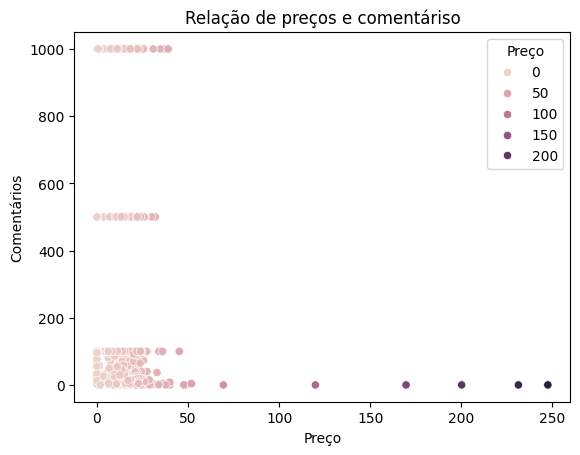

In [91]:
# Importando bibliotecas para construção do gráfico
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição dos valores
x = df['preço']
y = df['comentários']

# Ajustar a cor 
hue = df['preço']

# Criar scatter plot com pontos coloridos
sns.scatterplot(x=x, y=y, hue=hue)
plt.xlabel('Preço')
plt.ylabel('Comentários')
plt.title('Relação de preços e comentáriso')
plt.legend(title='Preço');

In [96]:
# Filtrando por faixas de preço
vendas_menor_20 = df[df['preço'] <= 20]
vendas_acima_21 = df[(df['preço'] >= 21) & (df['preço'] <= 60)]
vendas_acima_61 = df[(df['preço'] >= 61) & (df['preço'] <= 150)]
vendas_acima_151 = df[df['preço'] >= 151]

# Contando o número de vendidos
quantidade_vendas_menor_20 = vendas_menor_20.shape[0]
quantidade_vendas_acima_21 = vendas_acima_21.shape[0]
quantidade_vendas_acima_61 = vendas_acima_61.shape[0]
quantidade_vendas_acima_151 = vendas_acima_151.shape[0]


# Quantidade total de vendas
total_menor_20 = quantidade_vendas_menor_20* 20
total_acima_21 = quantidade_vendas_acima_21 * 21
total_acima_61 = quantidade_vendas_acima_61 * 61
total_acima_151 = quantidade_vendas_acima_151 *151


# Exibir o resultado
print("Quantidade de vendas com preço menor ou igual a R$20: ", quantidade_vendas_menor_20)
print("Total de vendas com preço menor ou igual a R$20: R$", total_menor_20)

print("\nQuantidade de vendas com preço maior ou igual a R$21: ", quantidade_vendas_acima_21)
print("Total de vendas com preço maior ou igual a R$21: R$", total_acima_21)

print("\nQuantidade de vendas com preço maior ou igual a R$61: ", quantidade_vendas_acima_61)
print("Total de vendas com preço maior ou igual a R$61: R$", total_acima_61)

print("\nQuantidade de vendas com preço maior ou igual a R$151: ", quantidade_vendas_acima_151)
print("Total de vendas com preço maior ou igual a R$151: R$", total_acima_151)


Quantidade de vendas com preço menor ou igual a R$20:  950
Total de vendas com preço menor ou igual a R$20: R$ 19000

Quantidade de vendas com preço maior ou igual a R$21:  176
Total de vendas com preço maior ou igual a R$21: R$ 3696

Quantidade de vendas com preço maior ou igual a R$61:  2
Total de vendas com preço maior ou igual a R$61: R$ 122

Quantidade de vendas com preço maior ou igual a R$151:  4
Total de vendas com preço maior ou igual a R$151: R$ 604


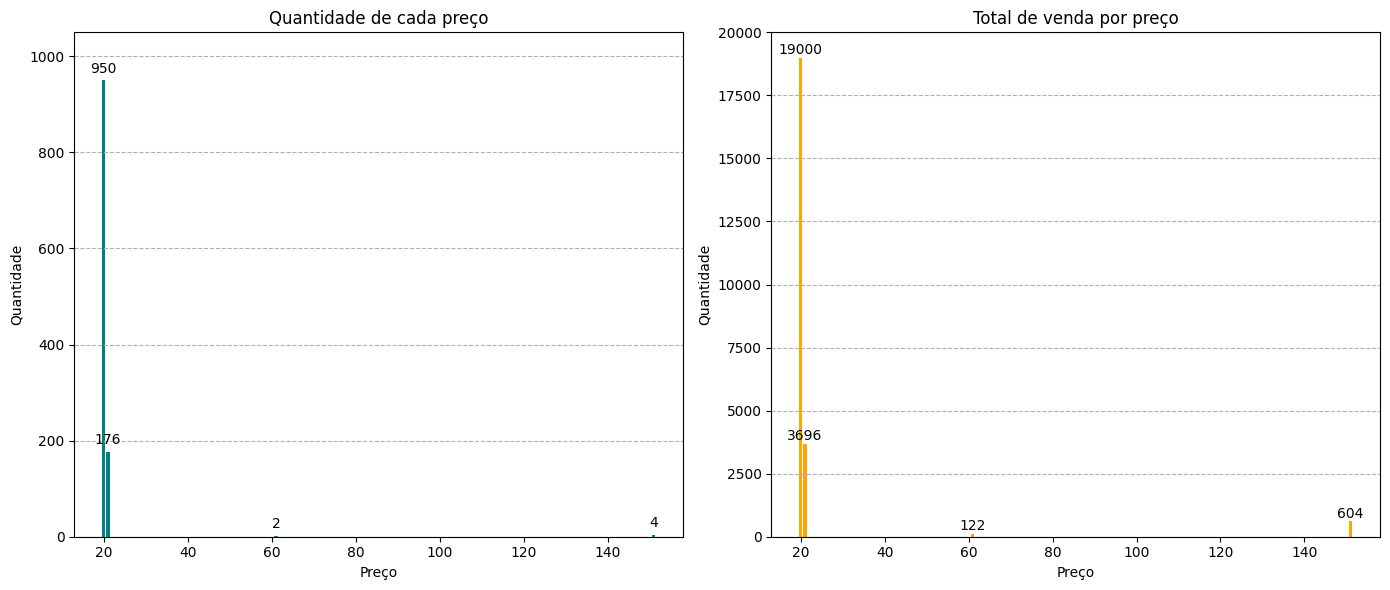

In [97]:
# Importando biblioreca para criar gráfico
import matplotlib.pyplot as plt

# Dados fornecidos
x = [20, 21, 61, 151]  # Preços
y1 = [950, 176, 2, 4]   # Quantidade
y2 = [19000, 3696, 122, 604]  # Total de vendas

# Criando os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Quantidade de cada preço
ax1.bar(x, y1, color='teal')
ax1.set_title('Quantidade de cada preço')
ax1.set_xlabel('Preço')
ax1.set_ylabel('Quantidade')
ax1.grid(axis='y', linestyle='--')
ax1.set_ylim(0, max(y1) + 100)

# Adicionar os valores nas barras do primeiro gráfico
for i in range(len(x)):
    ax1.text(x[i], y1[i] + 10, str(y1[i]), ha='center', va='bottom')

# Total de venda por preço
ax2.bar(x, y2, color='orange')
ax2.set_title('Total de venda por preço')
ax2.set_xlabel('Preço')
ax2.set_ylabel('Quantidade')
ax2.grid(axis='y', linestyle='--')
ax2.set_ylim(0, max(y2) + 1000)

# Adicionar os valores nas barras do segundo gráfico
for i in range(len(x)):
    ax2.text(x[i], y2[i] + 10, str(y2[i]), ha='center', va='bottom')

# Ajustar o layout
plt.tight_layout();


In [98]:
# Total de Vendas
total_vendas = total_menor_20 + total_acima_21 + total_acima_61 + total_acima_151
print(f'Total de vendas: {total_vendas}')

Total de vendas: 23422
